[View in Colaboratory](https://colab.research.google.com/github/py4mac/google-colab/blob/master/cnn.ipynb)

In [2]:
!pip install keras kaggle

    100% |████████████████████████████████| 61kB 3.6MB/s 
    100% |████████████████████████████████| 235kB 7.1MB/s 
  Running setup.py bdist_wheel for kaggle ... - done
  Stored in directory: /root/.cache/pip/wheels/44/2c/df/22a6eeb780c36c28190faef6252b739fdc47145fd87a6642d4
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#from googleapiclient.discovery import build
#import io, os
#from googleapiclient.http import MediaIoBaseDownload
#from google.colab import auth

#auth.authenticate_user()

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp /content/gdrive/My\ Drive/kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2707            True  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge       9875            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4134            True  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research         Knowledge         27           False  
pubg-finish-placement-prediction               2019-01-30 23:59:00  Playground            Swag        207           False  
human-protein-atlas-image-classification       2019-01-10 23:59:00  Featured           $37,000        470           False  
two-sigm

In [8]:
!kaggle competitions download digit-recognizer -p /content/gdrive/My\ Drive/github

 96% 70.0M/73.2M [00:00<00:00, 82.7MB/s]
100% 73.2M/73.2M [00:00<00:00, 128MB/s] 
 94% 46.0M/48.8M [00:00<00:00, 60.2MB/s]
100% 48.8M/48.8M [00:00<00:00, 103MB/s] 
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 37.2MB/s]


In [10]:
!ls /content/gdrive/My\ Drive/github

cnn.ipynb  google-colab  README.md  sample_submission.csv  test.csv  train.csv


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [21]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
train = pd.read_csv("/content/gdrive/My Drive/github/train.csv")
test = pd.read_csv("/content/gdrive/My Drive/github/test.csv")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

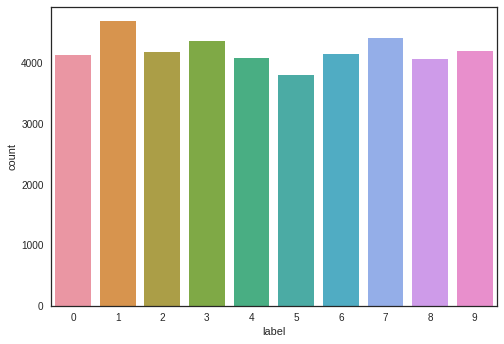

In [22]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [25]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [27]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [0]:
X_train = X_train / 255.0
test = test / 255.0

In [0]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [30]:
X_train.shape

(42000, 28, 28, 1)